### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Jiacheng Liu, Hetu Feng

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**
    This project requires the following packages: 
    - pandas, numpy, requests, BeautifulSoup and Comment from bs4, csv, and matplotlib
    
    I set two command-line parameters here (-source=remote, -source=local) in order to access our data both directly from the web and from the local disk before modeling. More specifically, in order to gather data directly from the API and other webpages, you can type the following in the command line:
    - python3 main.py -source=remote  
    
    This also requests the downloaded file “ori_position_2.csv” in the same folder in order to run remote successfully. The program outputs six csv files which contain the original data, four resulted csv file, and a visualization figure. After having seven original csv files on disk (one downloaded from the web and other six created from “remote”), you can access data by inputting:
    - python3 main.py -source=local
    
    which will only output the four resulted csv files and the final visualization figure. It saves time of waiting for scraping data from the web. Therefore, you have to run the “remote” command-line before running “local”, otherwise, directly running “local” would result in error since some input csv files are missing. Command lines with any other parameters (include no parameters) would bring no result. In that case, I will remind users with “Please enter a valid parameter: -source=remote / -source=local”.


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    As what I talked about below in 7, in order to solve the “name conversion” problem, I combined the API data set and the downloaded static dataset and create a new one. I could probably improve my code here by creating two separate versions of datasets where one contains all players’ position information with “normal” names and the other one contains all players’ position information with names written in special characters. That would give a clearer view when merging with other data sources..  

4.  **Anything else you feel is relevant to the grading of your project your project.**

    No. 

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
    
    The core of the research project focuses on investigating the NBA’s positional revolution. The project aims at finding the trend of positional dominance (guard vs forward vs center) in the NBA in recent twenty years. It comes to the specific research question that in the NBA, when or during which period centers start to fade while guards and forwards begin to take the dominance in recent twenty years.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    I analyze the datasets from three approaches: I look at the changes of the player’s game statistics (including field goal attempt and usage percentage), the player’s salary information, and the NBA’s draft information based on three positions over the years. By looking at the first three trending graphs, it is obvious that the dominance of guards is keep increasing, thus, our initial assumption that centers faded while guards and forwards took the dominance is partially confirmed; however, since 1998, centers were already not as dominant as guards and forwards. Also, the performance of centers was keep dropping from 1998 to 2007, then started going up around 2008. Another interesting founding I did not expect before is that forwards were as dominant as guards from 1998 to 2007, but they started to fade around 2008. When I look at the salary trend, it does not bring a meaningful result. The salary of each position is gradually increasing over the years and there are only some slight differences among them, so that it is hard to conclude from it. Therefore, I consider the salary information as a relatively unimportant factor toward the topic. As a result, I conclude that while the guard has dominated the NBA in recent twenty years, performance of the center has become more significant around 2008, at the same time the forward has faded. The “neutralization” of the dominance of these three positions just balances the NBA. 

7. **What difficulties did you have in completing the project?**  

    The first difficulty of the project is that when I actually scrape data from the API, I find out the position information is incomplete, a lot of players have blank positions corresponding to their names. Another difficulty is that some player names contain special characters such as “Toni Kukoč”, which is written as “Toni Kukoc” in the salary data source. Therefore, I have a hard time mapping these player names. As a result, I came up with a method that solves these two problems at the same time. I downloaded another player name vs position dataset from Basketball-Reference. It provides a more complete record of all players’ positions. Also, player names in this data set contain special characters which helps to merge with three other datasets: FGA, USG, and draft; while the API data contains “normal” versions of player names that easily map the salary dataset. In this case, I combine the API data set and the downloaded static data set, and create a new data set. When I merge it with other datasets using Pandas data frames, it automatically maps the version of names that the other data sources share. 


8. **What skills did you wish you had while you were doing the project?**

    I wish I could manipulate some python packages (such as Pandas, Matplotlib) more proficiently. Although I have done something with those packages before, I was still not familiar with some methods for processing data using Pandas and visualizing data using Matplotlib. I spent some time looking at the documentation and searching online to find methods to apply on the data. 



9. **What would you do “next” to expand or augment the project?**

    I would augment the project from three perspectives. First, I would expand the length of years that I investigate, so that I could gather and process more data and give a more extensive analysis on the NBA positional dominance revolution of all time. Second, I would select some more features that could reflect players’ performance based on their positions. Finally, since I have already analyzed the positional dominance based on several features such as field goal attempts and salaries, I could create a model that combines the results of all features and assigns weights on different features based on their relevance and importance. That would make the final result more meaningful and convincing.


**Access data (web scraping)**

In [1]:
## Build scrapers and API crawlers to create functions 
import requests
from bs4 import BeautifulSoup, Comment


## Retrieve URLs with parameters pages/years, return the corresponding soup objects 
def url_to_soup_API():
    
    API_url = 'https://www.fantasybasketballnerd.com/service/players'
    API_response = requests.get(API_url)
    position_soup = BeautifulSoup(API_response.content, 'lxml')
    
    return position_soup


def url_to_soup_FGA(year):
    
    FGA_url = f'https://www.basketball-reference.com/leagues/NBA_{year + 1}_per_game.html'
    
    try:
        FGA_response = requests.get(FGA_url)
        FGA_response.raise_for_status()
    
    # Raise exceptions when requested year does not response
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    FGA_soup = BeautifulSoup(FGA_response.content, 'lxml')
    
    return FGA_soup
    

def url_to_soup_USG(year):
    
    USG_url = f'https://www.basketball-reference.com/leagues/NBA_{year + 1}_advanced.html'

    try:
        USG_response = requests.get(USG_url)
        USG_response.raise_for_status()
    
    # Raise exceptions when requested year does not response
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    USG_soup = BeautifulSoup(USG_response.content, 'lxml')
    
    return USG_soup
    
    
def url_to_soup_salary(year_start, year_end):
    
    salary_url = f'https://hoopshype.com/salaries/players/{year_start}-{year_end}/'
    
    # Limit the start year and end year to be integers 
    if type(year_start) == int and type(year_end) == int: 
        # Limit the range of the start year and the end year, make sure the end year always exceeds the start year by 1
        if year_start >= 1998 and year_start <= 2018 and year_end >= 1999 and year_end <= 2019 and year_end - year_start == 1:        
            salary_response = requests.get(salary_url)
        else:
            print('Year number out of range!')
            return None 
    else:
        print('Year number accepts integer only!')
        return None 
    
    salary_soup = BeautifulSoup(salary_response.content, 'lxml')
    
    return salary_soup


def url_to_soup_draft(year):
    
    draft_url = f'https://www.basketball-reference.com/draft/NBA_{year}.html'
    
    try:
        draft_response = requests.get(draft_url)
        draft_response.raise_for_status()
    
    # Raise exceptions when requested year does not response
    except requests.exceptions.HTTPError as e:
        print(e)
        return None
    
    draft_soup = BeautifulSoup(draft_response.content, 'lxml')
    
    return draft_soup


def url_to_soup_EV():
    
    EV_url = 'https://www.basketball-reference.com/draft/preview.html'
    EV_response = requests.get(EV_url)
    EV_soup = BeautifulSoup(EV_response.content, 'lxml')
            
    return EV_soup

    
## Transfer soup objects into data structures
def soup_API_to_list(position_soup):
    
    position_record = []
    name = []
    position = []
    
    # Extract the table that contains all player info
    main_table = position_soup.find_all('player')
    
    for player in main_table:
        player_name = player.find('name').text
        player_position = player.find('position').text
        
        name.append(player_name)
        position.append(player_position)
       
    for i in range(len(name)):
        position_record.append((name[i], position[i]))
        
    return position_record


def soup_FGA_to_list(FGA_soup):
    
    FGA_record_old = []
    name = []
    FGA = []
    games_played = []
    minutes_played_per_game = []
    
    # Extract the table that contains all player stats 
    main_table = FGA_soup.find('table', {'id': 'per_game_stats'})
    
    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[0].text.strip('*')
            ## player FGA
            player_FGA = player.find_all('td')[8].text
            ## player total games played
            player_GP = player.find_all('td')[4].text
            ## player minutes played per game 
            player_MP = player.find_all('td')[6].text
            
            name.append(player_name)
            FGA.append(player_FGA)
            games_played.append(player_GP)
            minutes_played_per_game.append(player_MP)
                
    for i in range(len(name)):
        FGA_record_old.append((name[i], FGA[i], games_played[i], minutes_played_per_game[i]))
    
    # Remove duplicate names that appear multiple times in the record 
    name_no_repeat = [i for n, i in enumerate(name) if i not in name[:n]]
    FGA_record = []
    
    for item in name_no_repeat:
        index = name.index(item)
        FGA_record.append(FGA_record_old[index])
    
    return FGA_record


def soup_USG_to_list(USG_soup):
    
    USG_record_old = []
    name = []
    USG = []
    games_played = []
    minutes_played = []
    
    # Extract the table that contains all player stats 
    main_table = USG_soup.find('table', {'id': 'advanced_stats'})

    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[0].text.strip('*')
            ## player USG%
            player_USG = player.find_all('td')[17].text
            ## player total games played
            player_GP = player.find_all('td')[4].text
            ## player total minutes played 
            player_MP = player.find_all('td')[5].text
            
            name.append(player_name)
            USG.append(player_USG)
            games_played.append(player_GP)
            minutes_played.append(player_MP)
    
    for i in range(len(name)):
        USG_record_old.append((name[i], USG[i], games_played[i], minutes_played[i]))
    
    # Remove duplicate names that appear multiple times in the record 
    name_no_repeat = [i for n, i in enumerate(name) if i not in name[:n]]
    USG_record = []
    
    for item in name_no_repeat:
        index = name.index(item)
        USG_record.append(USG_record_old[index])
       
    return USG_record


def soup_salary_to_list(salary_soup):
    
    salary_record = []
    name = []
    salary = []
    
    # Extract the table that contains all player salary information
    main_table = salary_soup.find('table', {'class': 'hh-salaries-ranking-table hh-salaries-table-sortable responsive'})

    for player in main_table.find_all('tr')[1:]:
        if len(player.find_all('td')) > 0:
            ## player name
            player_name = player.find_all('td')[1].find('a').text.strip()
            ## player salary
            player_salary = player.find_all('td')[2].get('data-value')
            
            name.append(player_name)
            salary.append(player_salary)
    
    for i in range(len(name)):
        salary_record.append((name[i], salary[i]))
    
    return salary_record
      
    
def soup_draft_to_list(draft_soup):
    
    draft_record = []
    Pk = []
    name = []
    
    # Extract the table that contains all player draft information
    main_table = draft_soup.find('table', {'id': 'stats'})
    
    for player in main_table.find_all('tr'):
        if (len(player.find_all('td')) > 2):
            ## player pick rank
            player_Pk = player.find_all('td')[0].get('csk')
            ## player name 
            player_name = player.find_all('td')[2].text
                
            Pk.append(player_Pk)
            name.append(player_name)
            
                   
    for i in range(len(Pk)):
        draft_record.append((Pk[i], name[i]))
    
    return draft_record


def soup_EV_to_list(EV_soup):
    
    EV_record = []
    Pk = []
    EV = []
    
    # Extract all the comments inside the web metadata
    comments = EV_soup.find_all(string = lambda text: isinstance(text, Comment))
     
    # Extract the table that contains the expected values corresponding to the NBA draft positions
    for comment in comments:
        if comment.find("table") > 0:
            EV_soup = BeautifulSoup(comment, 'lxml')
            main_table = EV_soup.find('table', {'id': 'picks'})
            if main_table == None:
                break
            else:
                for player in main_table.find_all('tr')[1:]:
                    if len(player.find_all('td')) > 0:
                        ## player pick rank 
                        player_Pk = player.find_all('td')[0].text
                        ## pick's expected value 
                        pick_EV = player.find_all('td')[2].text
            
                        Pk.append(player_Pk)
                        EV.append(pick_EV)
    
    for i in range(len(Pk)):
        EV_record.append((Pk[i], EV[i]))
    
    return EV_record


## Collect each data set individually 
def position():
    
    position_records = []
    
    position_soup = url_to_soup_API()
    position_record = soup_API_to_list(position_soup)    
    # Convert data structure from a list of tuples to a nested list
    position_records = [list(record) for record in position_record]
    #print(len(position_records))
    
    return position_records


def FGA():
    
    FGA_records = []
    
    # Scrape webpage resources from 1998 to 2018
    for year in range(1998, 2019):
        FGA_soup = url_to_soup_FGA(year)
        FGA_record = soup_FGA_to_list(FGA_soup)
        
        for item in FGA_record:
            item += (year,)
            FGA_records.append(item)
        
    # Convert data structure from a list of tuples to a nested list
    FGA_records = [list(FGA_record) for FGA_record in FGA_records]
    #print(len(FGA_records))
      
    return FGA_records


def USG():
    
    USG_records = []
        
    # Scrape webpage resources from 1998 to 2018
    for year in range(1998, 2019):
        USG_soup = url_to_soup_USG(year)
        USG_record = soup_USG_to_list(USG_soup)
        
        for item in USG_record:
            item += (year,)
            USG_records.append(item)
        
    # Convert data structure from a list of tuples to a nested list
    USG_records = [list(USG_record) for USG_record in USG_records]
    #print(len(USG_records))
      
    return USG_records


def salary(): 
    
    salary_records = []
        
    # Scrape webpage resources from 1998 to 2018
    for year in range(1998, 2019):
        salary_soup = url_to_soup_salary(year, year + 1)
        salary_record = soup_salary_to_list(salary_soup)
        
        for item in salary_record:
            item += (year,)
            salary_records.append(item)
    
    # Convert data structure from a list of tuples to a nested list
    salary_records = [list(salary_record) for salary_record in salary_records]
    #print(len(salary_records))
      
    return salary_records


def draft():
    
    draft_records = []
        
    # Scrape webpage resources from 1998 to 2018
    for year in range(1998, 2019):
        draft_soup = url_to_soup_draft(year)
        draft_record = soup_draft_to_list(draft_soup)
        
        for item in draft_record:
            item += (year,)
            draft_records.append(item)
        
    # Convert data structure from a list of tuples to a nested list
    draft_records = [list(draft_record) for draft_record in draft_records]
    #print(len(draft_records))
      
    return draft_records


def EV():
    
    EV_records = []
    
    EV_soup = url_to_soup_EV()
    EV_record = soup_EV_to_list(EV_soup)
       
    # Convert data structure from a list of tuples to a nested list
    EV_records = [list(record) for record in EV_record]
    #print(len(EV_record))
    
    return EV_records


## Function that collect all information from 1998 to 2018
def scrape_all():
    
    # Collect all scraped data into a list for future extraction
    NBA_records = [position(), FGA(), USG(), salary(), draft(), EV()]
    
    return NBA_records


records = scrape_all()

**Store data**

In [2]:
import csv


## Export list of lists to csv files
## Original data 
with open('ori_position_1.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names 
    wr.writerow(('player_name', 'position'))
    # Write in the position table 
    wr.writerows(records[0])

with open('ori_FGA.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names 
    wr.writerow(('player_name', 'field_goal_attempt', 'games_played', 'minutes_played_per_game', 'year'))
    # Write in the FGA table
    wr.writerows(records[1])

with open('ori_USG.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names
    wr.writerow(('player_name', 'usage_percentage', 'games_played', 'total_minutes_played', 'year'))
    # Write in the USG table
    wr.writerows(records[2])

with open('ori_salary.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names
    wr.writerow(('player_name', 'salary', 'year'))
    # Write in the salary table
    wr.writerows(records[3])

with open('ori_draft.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names
    wr.writerow(('pick_rank', 'player_name', 'year'))
    # Write in the draft table
    wr.writerows(records[4])

with open('ori_EV.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_ALL)
    # Assign attribute names
    wr.writerow(('pick_rank', 'expected_value'))
    # Write in the expected value table
    wr.writerows(records[5])

**Model data**

In [3]:
import pandas as pd


## Convert stored data into DataFrames
ori_position_1_df = pd.read_csv('ori_position_1.csv')
ori_position_2_df = pd.read_csv('ori_position_2.csv')
ori_FGA_df = pd.read_csv('ori_FGA.csv')
ori_USG_df = pd.read_csv('ori_USG.csv')
ori_salary_df = pd.read_csv('ori_salary.csv')
ori_draft_df = pd.read_csv('ori_draft.csv')
ori_EV_df = pd.read_csv('ori_EV.csv')


## Make a copy of the original data frame
position_1_df = ori_position_1_df.copy()
FGA_df = ori_FGA_df.copy()
USG_df = ori_USG_df.copy()
salary_df = ori_salary_df.copy()
draft_df = ori_draft_df.copy()
EV_df = ori_EV_df.copy()


## combine SF and PF as F (forwards), SG and PG as G (guards)
position_1_df = position_1_df.replace(['SF', 'PF'], 'F')
position_1_df = position_1_df.replace(['SG', 'PG'], 'G')

## Clean alternative position csv
position_2_df = ori_position_2_df.copy()
position_2_df = position_2_df[['player_name', 'position']]
position_2_df['player_name'] = position_2_df['player_name'].apply(lambda x: x.split('\\')[0])
position_2_df['player_name'] = position_2_df['player_name'].apply(lambda x: x.strip('*'))
position_2_df = position_2_df.drop_duplicates(subset = 'player_name', keep='first')
position_2_df['position'] = position_2_df['position'].apply(lambda x: x.split('-')[0])
position_2_df = position_2_df.replace(['SF', 'PF'], 'F')
position_2_df = position_2_df.replace(['SG', 'PG'], 'G')

## delete players that have games played less than 30 and minutes played per game less than 15 minutes
FGA_df.games_played = FGA_df.games_played.astype(int)
FGA_df = FGA_df[FGA_df.games_played >= 30]
FGA_df.minutes_played_per_game = FGA_df.minutes_played_per_game.astype(float)
FGA_df = FGA_df[FGA_df.minutes_played_per_game >= 15.0]
#FGA_df.info()
FGA_df = FGA_df.drop('games_played', axis = 1)
FGA_df = FGA_df.drop('minutes_played_per_game', axis = 1)

## delete players that have games played less than 30 and total minutes played less than 15 minutes
USG_df.games_played = USG_df.games_played.astype(int)
USG_df = USG_df[USG_df.games_played >= 30]
USG_df.total_minutes_played = USG_df.total_minutes_played.astype(float)
USG_df = USG_df[USG_df.total_minutes_played >= 450.0]
#USG_df.info()
USG_df = USG_df.drop('games_played', axis = 1)
USG_df = USG_df.drop('total_minutes_played', axis = 1)

## Sort FGA DataFrame according to its values group by years
FGA_df.field_goal_attempt = FGA_df.field_goal_attempt.astype(float)
FGA_df = FGA_df.groupby(['year']).apply(lambda x: x.sort_values(["field_goal_attempt"], ascending = False)).reset_index(drop=True)

## Sort USG DataFrame according to its values group by years 
USG_df.usage_percentage = USG_df.usage_percentage.astype(float)
USG_df = USG_df.groupby(['year']).apply(lambda x: x.sort_values(["usage_percentage"], ascending = False)).reset_index(drop=True)

## Sort salary DataFrame according to its top 80 values group by years
salary_df.salary = salary_df.salary.astype(int)
salary_df = salary_df.groupby(['year']).apply(lambda x: x.sort_values(["salary"], ascending = False)).reset_index(drop=True)
salary_df = salary_df.groupby(['year']).head(80)

## Integrate draft DataFrame and EV DataFrame and sort the new DataFrame according to its values group by year
new_draft_df = pd.merge(draft_df, EV_df, on = 'pick_rank')
new_draft_df = new_draft_df.drop(['pick_rank'], axis = 1)
new_draft_df = new_draft_df[['player_name', 'expected_value', 'year']]
new_draft_df.expected_value = new_draft_df.expected_value.astype(float)
new_draft_df = new_draft_df.groupby(['year']).apply(lambda x: x.sort_values(["expected_value"], ascending = False)).reset_index(drop=True)


## Integrate all data into four data frames: position vs FGA, position vs USG, position vs salary, position vs draft
## Integrate position_1_df and position_2_df into position_df
position_df = position_1_df.append(position_2_df)


## position vs FGA
position_FGA_df = pd.merge(position_df, FGA_df, on = 'player_name')
position_FGA_df = position_FGA_df.drop('player_name', axis = 1)
position_FGA_df = position_FGA_df[['position', 'field_goal_attempt', 'year']]
position_FGA_df = position_FGA_df.groupby(['year']).apply(lambda x: x.sort_values(["field_goal_attempt"], ascending = False)).reset_index(drop=True)

## position vs USG
position_USG_df = pd.merge(position_df, USG_df, on = 'player_name')
position_USG_df = position_USG_df.drop('player_name', axis = 1)
position_USG_df = position_USG_df[['position', 'usage_percentage', 'year']]
position_USG_df = position_USG_df.groupby(['year']).apply(lambda x: x.sort_values(["usage_percentage"], ascending = False)).reset_index(drop=True)

## position vs salary
position_salary_df = pd.merge(position_df, salary_df, on = 'player_name')
position_salary_df = position_salary_df.drop('player_name', axis = 1)
position_salary_df = position_salary_df[['position', 'salary', 'year']]
position_salary_df = position_salary_df.groupby(['year']).apply(lambda x: x.sort_values(["salary"], ascending = False)).reset_index(drop=True)

## position vs draft
position_draft_df = pd.merge(position_df, new_draft_df, on = 'player_name')
position_draft_df = position_draft_df.drop(['player_name'], axis = 1)
position_draft_df = position_draft_df[['position', 'expected_value', 'year']]
position_draft_df = position_draft_df.groupby(['year']).apply(lambda x: x.sort_values(["expected_value"], ascending = False)).reset_index(drop=True)


## Keep grouping data frames, make relationships between position vs average FGA, average USG, average salary, and sum of expected value from draft
## position vs average FGA
position_avgFGA_df = position_FGA_df.groupby(['year', 'position'], as_index = False).mean()
position_avgFGA_df = position_avgFGA_df.pivot(index = 'year', columns = 'position', values = 'field_goal_attempt')
## position vs average USG
position_avgUSG_df = position_USG_df.groupby(['year', 'position'], as_index = False).mean()
position_avgUSG_df = position_avgUSG_df.pivot(index = 'year', columns = 'position', values = 'usage_percentage')
## position vs average salary
position_avgsalary_df = position_salary_df.groupby(['year', 'position'], as_index = False).mean()
position_avgsalary_df = position_avgsalary_df.pivot(index = 'year', columns = 'position', values = 'salary')
## position vs average expected value from draft
position_sumdraft_df = position_draft_df.groupby(['year', 'position'], as_index = False).sum()
position_sumdraft_df = position_sumdraft_df.pivot(index = 'year', columns = 'position', values = 'expected_value')


## Export DataFrame to csv files
## First update after data cleaning 
# position_1_df.to_csv('position_1.csv')
# position_2_df.to_csv('position_2.csv')
# FGA_df.to_csv('FGA.csv')
# USG_df.to_csv('USG.csv')
# salary_df.to_csv('salary.csv')
# draft_df.to_csv('draft.csv')
# EV_df.to_csv('EV.csv')
# new_draft_df.to_csv('new_draft.csv')

# Second update after combining tabels 
# position_df.to_csv('position.csv')
# position_FGA_df.to_csv('position_FGA.csv')
# position_USG_df.to_csv('position_USG.csv')
# position_salary_df.to_csv('position_salary.csv')
# position_draft_df.to_csv('position_draft.csv')

## Thrid update after reshaping tables (output datasets)
# position_avgFGA_df.to_csv('position_avgFGA.csv')
# position_avgUSG_df.to_csv('position_avgUSG.csv')
# position_avgsalary_df.to_csv('position_avgsalary.csv')
# position_sumdraft_df.to_csv('position_avgdraft.csv')

**Visualization**

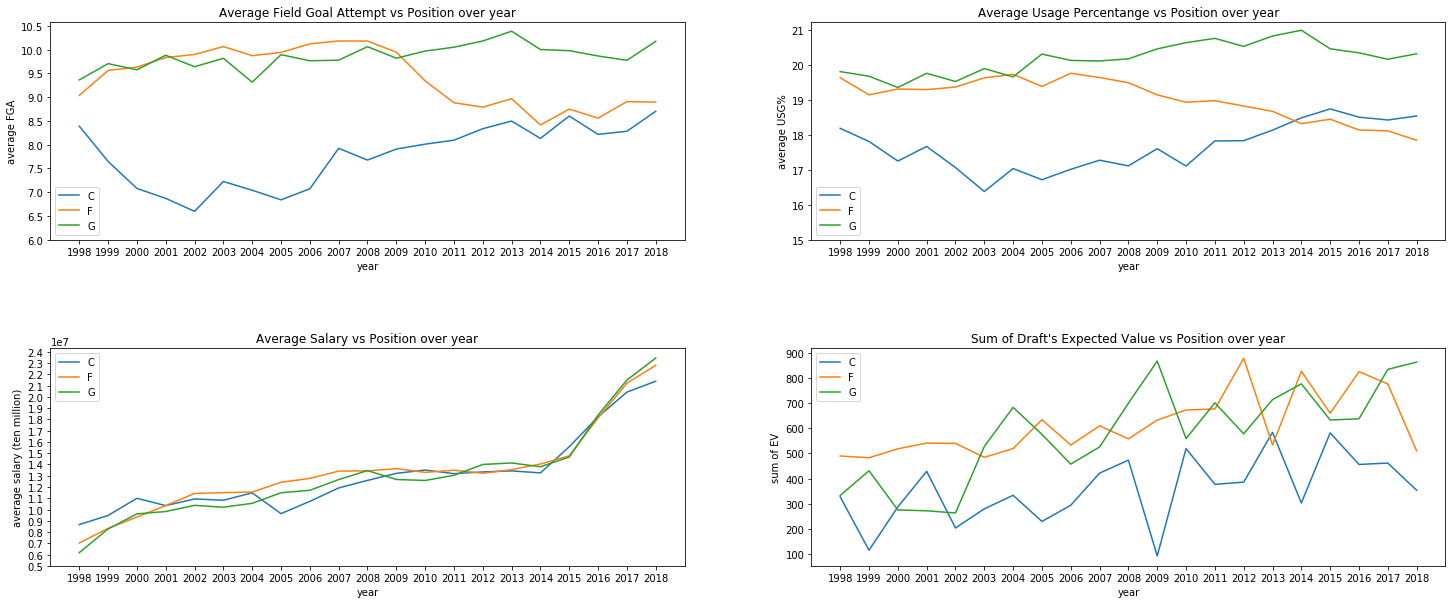

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize = (25, 10))
fig.subplots_adjust(wspace = 0.2, hspace = 0.5)

## Set up legend
positions = ['C', 'F', 'G']

for i in range(3):
    axes[0, 0].plot(position_avgFGA_df.iloc[:,i], label=positions[i])
    axes[0, 1].plot(position_avgUSG_df.iloc[:,i], label=positions[i])
    axes[1, 0].plot(position_avgsalary_df.iloc[:,i], label=positions[i])
    axes[1, 1].plot(position_sumdraft_df.iloc[:,i], label=positions[i])

## Upper left, visualize players' average field goal attempts vs position over year
axes[0, 0].legend()
axes[0, 0].set_title('Average Field Goal Attempt vs Position over year')
axes[0, 0].set_xlabel('year')
axes[0, 0].set_ylabel('average FGA')
x_ticks_1 = np.arange(1998, 2019, 1)
y_ticks_1 = np.arange(6, 11, 0.5)
axes[0, 0].set_xticks(x_ticks_1)
axes[0, 0].set_yticks(y_ticks_1)

## Upper right, visualize players' average usage percentange vs position over year 
axes[0, 1].legend()
axes[0, 1].set_title('Average Usage Percentange vs Position over year')
axes[0, 1].set_xlabel('year')
axes[0, 1].set_ylabel('average USG%')
x_ticks_2 = np.arange(1998, 2019, 1)
y_ticks_2 = np.arange(15, 22, 1)
axes[0, 1].set_xticks(x_ticks_2)
axes[0, 1].set_yticks(y_ticks_2)

## Bottom left, visualize players' average salaries vs position over year 
axes[1, 0].legend()
axes[1, 0].set_title('Average Salary vs Position over year')
axes[1, 0].set_xlabel('year')
axes[1, 0].set_ylabel('average salary (ten million)')
x_ticks_3 = np.arange(1998, 2019, 1)
y_ticks_3 = np.arange(5000000, 25000000, 1000000)
axes[1, 0].set_xticks(x_ticks_3)
axes[1, 0].set_yticks(y_ticks_3)

## Bottom right, visualize sum of players' expected values in draft vs position over year 
axes[1, 1].legend()
axes[1, 1].set_title("Sum of Draft's Expected Value vs Position over year")
axes[1, 1].set_xlabel('year')
axes[1, 1].set_ylabel('sum of EV')
x_ticks_4 = np.arange(1998, 2019, 1)
y_ticks_4 = np.arange(100, 1000, 100)
axes[1, 1].set_xticks(x_ticks_4)
axes[1, 1].set_yticks(y_ticks_4)

## Export figure 
#fig.show()
fig.savefig('Visualization')

Analysis of the graphs can be found in question 6 above (the conclusion).